# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
%load_ext memory_profiler

A_inverted = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [-3, 3, 0, 0, -2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [2, -2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, -3, 3, 0, 0, -2, -1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 2, -2, 0, 0, 1, 1, 0, 0],
              [-3, 0, 3, 0, 0, 0, 0, 0, -2, 0, -1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, -3, 0, 3, 0, 0, 0, 0, 0, -2, 0, -1, 0],
              [9, -9, -9, 9, 6, 3, -6, -3, 6, -6, 3, -3, 4, 2, 2, 1],
              [-6, 6, 6, -6, -3, -3, 3, 3, -4, 4, -2, 2, -2, -2, -1, -1],
              [2, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 2, 0, -2, 0, 0, 0, 0, 0, 1, 0, 1, 0],
              [-6, 6, 6, -6, -4, -2, 4, 2, -3, 3, -3, 3, -2, -1, -2, -1],
              [4, -4, -4, 4, 2, 2, -2, -2, 2, -2, 2, -2, 1, 1, 1, 1]])

In [2]:
def df(img, i, j):
    while i + 2 > img.shape[0]:
        i -= 1
    while j + 2 > img.shape[1]:
        j -= 1
        
    dx = (img[i + 1, j] - img[i - 1, j])/2
    dy = (img[i, j + 1] - img[i, j - 1])/2
    dxy = (img[i + 1, j + 1] - img[i + 1, j - 1] - img[i - 1, j + 1] + img[i - 1, j - 1])/4
    return (dx, dy, dxy)


def bicubic_interpolate(img, scale_vertical, scale_horizontal):
    X, Y = img.shape
    Xout = int(X*scale_vertical)
    Yout = int(Y*scale_horizontal)
    result = np.zeros(shape=(Xout, Yout))
    global Ainv

    for i in range(Xout):
        for j in range(Yout):
            u, temp_x = np.modf(i/scale_vertical)
            v, temp_y = np.modf(j/scale_horizontal)
            temp_x = int(temp_x)
            temp_y = int(temp_y)
            temp_x_1 = temp_x + 1
            temp_y_1 = temp_y + 1
            
            while temp_x_1 > img.shape[0] - 1:
                temp_x_1 -= 1
            while temp_y_1 > img.shape[1] - 1:
                temp_y_1 -= 1
            
            A = img[temp_x, temp_y]
            Ax, Ay, Axy = df(img, temp_x, temp_y)
            B = img[temp_x_1, temp_y]
            Bx, By, Bxy = df(img, temp_x_1, temp_y)
            C = img[temp_x_1, temp_y_1]
            Cx, Cy, Cxy = df(img, temp_x_1, temp_y_1)
            D = img[temp_x, temp_y_1]
            Dx, Dy, Dxy = df(img, temp_x, temp_y_1)
            
            x = np.array([A, B, D, C, Ax, Bx, Dx, Cx, Ay, By, Dy, Cy, Axy, Bxy, Dxy, Cxy]).T
            a = np.reshape(np.matmul(A_inverted, x), (4, 4), order='f')
            rest_x = np.array([1, u, u**2, u**3])
            rest_y = np.transpose(np.array([1, v, v**2, v**3]))
            
            result[i, j] = np.matmul(np.matmul(rest_x, a), rest_y)
                    
    return result

In [3]:
def bilinear_interpolate(img, scale_vertical, scale_horizontal):
    X, Y = img.shape
    Xout = int(X*scale_vertical)
    Yout = int(Y*scale_horizontal)
    result = np.zeros(shape=(Xout, Yout))
    
    for i in range(Xout):
        for j in range(Yout):
            temp_x = i/scale_vertical
            temp_y = j/scale_horizontal
            p=(i+0.0)/scale_vertical - temp_x
            q=(j+0.0)/scale_horizontal - temp_y
            temp_x=int(temp_x) - 1
            temp_y=int(temp_y) - 1

            result[i, j] = int(img[temp_x, temp_y]*(1 - p)*(1 - q) + img[temp_x, temp_y + 1]*q*(1 - p) + img[temp_x + 1, temp_y]*(1 - q)*p + img[temp_x + 1,temp_y + 1]*p*q)
                
    return result

In [4]:
if not os.path.exists("parrot.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp --no-check-certificate

parrot = cv2.imread('parrot.bmp')           # Read image
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) # Convert to RGB

<ipython-input-2-9d29e4cae5cd>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dx = (img[i + 1, j] - img[i - 1, j])/2
<ipython-input-2-9d29e4cae5cd>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  dxy = (img[i + 1, j + 1] - img[i + 1, j - 1] - img[i - 1, j + 1] + img[i - 1, j - 1])/4
<ipython-input-2-9d29e4cae5cd>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  dy = (img[i, j + 1] - img[i, j - 1])/2


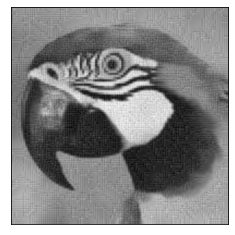

In [5]:
bicubic_parrot1 = bicubic_interpolate(parrot, 5, 5)

plt.imshow(bicubic_parrot1, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

<ipython-input-2-9d29e4cae5cd>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dx = (img[i + 1, j] - img[i - 1, j])/2
<ipython-input-2-9d29e4cae5cd>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  dxy = (img[i + 1, j + 1] - img[i + 1, j - 1] - img[i - 1, j + 1] + img[i - 1, j - 1])/4
<ipython-input-2-9d29e4cae5cd>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  dy = (img[i, j + 1] - img[i, j - 1])/2


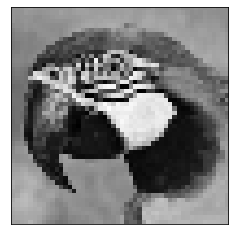

In [6]:
bicubic_parrot1 = bicubic_interpolate(parrot, 0.5, 0.5)

plt.imshow(bicubic_parrot1, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

<ipython-input-2-9d29e4cae5cd>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dx = (img[i + 1, j] - img[i - 1, j])/2
<ipython-input-2-9d29e4cae5cd>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  dxy = (img[i + 1, j + 1] - img[i + 1, j - 1] - img[i - 1, j + 1] + img[i - 1, j - 1])/4
<ipython-input-2-9d29e4cae5cd>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  dy = (img[i, j + 1] - img[i, j - 1])/2


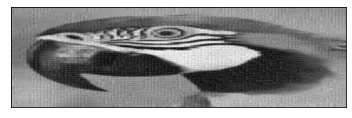

In [7]:
bicubic_parrot1 = bicubic_interpolate(parrot, 1.5, 5)

plt.imshow(bicubic_parrot1, cmap ="gray")
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

Algorytm bicubic daje najlepsze rezultaty spośród zastosowanych wcześniej algorytmów. Jest to efekt zgodny z oczekiwaniami, jednak jest to kosztem czasu obliczeń - za kazdym razem otrzymuje się RuntimeWarning. Dokładne zużycie czasu zostało zanalizowane poniżej.

In [9]:
print("Bilinear (skala = 3): ")
%memit bilinear_interpolate(parrot, 3, 3)
%timeit -r 5 -n 10 -o bilinear_interpolate(parrot, 3, 3)

print("\nBilinear (skala = 0.5): ")
%memit bilinear_interpolate(parrot, 0.5, 0.5)
%timeit -r 5 -n 10 -o bilinear_interpolate(parrot, 0.5, 0.5)

print("\nBicubic (skala = 3): ")
%memit bicubic_interpolate(parrot, 3, 3)
%timeit -r 5 -n 10 -o bicubic_interpolate(parrot, 3, 3)

print("\nBicubic (skala = 0.5): ")
%memit bicubic_interpolate(parrot, 0.5, 0.5)
%timeit -r 5 -n 10 -o bicubic_interpolate(parrot, 0.5, 0.5)

Bilinear (skala = 3): 
peak memory: 92.93 MiB, increment: 0.69 MiB
1.09 s ± 55.4 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)

Bilinear (skala = 0.5): 
peak memory: 92.93 MiB, increment: 0.00 MiB
29.2 ms ± 502 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)

Bicubic (skala = 3): 
<ipython-input-2-9d29e4cae5cd>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dx = (img[i + 1, j] - img[i - 1, j])/2
<ipython-input-2-9d29e4cae5cd>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  dxy = (img[i + 1, j + 1] - img[i + 1, j - 1] - img[i - 1, j + 1] + img[i - 1, j - 1])/4
<ipython-input-2-9d29e4cae5cd>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  dy = (img[i, j + 1] - img[i, j - 1])/2
peak memory: 92.93 MiB, increment: 0.00 MiB
9.44 s ± 499 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)

Bicubic (skala = 0.5): 
peak memory: 88.87 MiB, increment: 0.00 MiB
220 ms ± 5.97 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


<TimeitResult : 220 ms ± 5.97 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)>

Czas wykonywania algrytmu bicubic jest około dziewięciokrotnie dłuższy niż bilinear. Zużycie pamięci natomiast jest takie samo dla skali 3 dla obu algorytmów, jednak w przypadku bicubic dla skali 0.5 mamy mniejsze zużycie pamięci. Zgodnie z oczekiwaniami, wraz ze zwiększeniem skali, czas obliczeń rośnie.